# Accenture Virtual Internship

---

## Outline
* [Introduction](#introduction)
* [Load Data](#load-data)
* [Data Cleaning](#data-cleaning)
* [Exploratory Data Analysis](#exploratory-data-analysis)
* [Conclusion](#conclusion)

## Introduction

---
This notebook is part of a virtual internship with Accenture America. It is based on the analysis of data for a frictional company `SocialBuzz` who seeks to understand their content and it's categories.
I will be working three datasets from the company `Content`, `Reactions`, `Reactions Type` through the full data analytics processes and extracting relevant insights at the end.

## Load Data

---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime as dt
pd.set_option('display.max_columns', None)

In [3]:
label_1 = ['Content ID', 'User ID','Content Type', 'Category', 'URL']
label_2 = ['Content ID', 'User ID', 'Reactions Type', 'Datetime']
label_3 = ['Reactions Type', 'Sentiment', 'Score'] 
content_df = pd.read_csv('Content.csv', header=0, names=label_1)
reactions_df = pd.read_csv('Reactions.csv', header=0, names=label_2)
reaction_type_df = pd.read_csv('ReactionTypes.csv', header=0, names=label_3)

In [4]:
content_df.head()

,Content ID,User ID,Content Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
reactions_df.head()

,Content ID,User ID,Reactions Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [6]:
reaction_type_df.head()

,Reactions Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [7]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Content ID      25553 non-null  object
 1   User ID         22534 non-null  object
 2   Reactions Type  24573 non-null  object
 3   Datetime        25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


In [8]:
reaction_type_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Reactions Type  16 non-null     object
 1   Sentiment       16 non-null     object
 2   Score           16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [9]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Content ID    1000 non-null   object
 1   User ID       1000 non-null   object
 2   Content Type  1000 non-null   object
 3   Category      1000 non-null   object
 4   URL           801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


## Data Cleaning

---

In [10]:
# make soft copies
content = content_df.copy()
reactions = reactions_df.copy()
reaction_type = reaction_type_df.copy()

In [11]:
content.drop(['URL', 'User ID'], axis=1, inplace=True)

In [12]:
reactions.drop(['User ID'], axis=1, inplace=True)

In [13]:
reactions.dropna(inplace=True)

In [14]:
content.isnull().sum()

Content ID      0
Content Type    0
Category        0
dtype: int64

In [15]:
reactions.isnull().sum()

Content ID        0
Reactions Type    0
Datetime          0
dtype: int64

In [16]:
reaction_type.isna().sum()

Reactions Type    0
Sentiment         0
Score             0
dtype: int64

No null values in the three dataset

In [17]:
content['Content Type'].unique()

array(['photo', 'video', 'GIF', 'audio'], dtype=object)

In [18]:
# remove special characters
content['Category']= content['Category'].str.replace('[^a-zA-Z0-9]', '')

C:\Users\PC\AppData\Local\Temp\ipykernel_13008\1741852892.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  content['Category']= content['Category'].str.replace('[^a-zA-Z0-9]', '')


DataType Conversions

In [19]:
# convert Category and Content Type columns to categorical datatypes
content = content.astype({"Content Type": 'category', "Category": 'category'})

In [20]:
reactions= reactions.astype({"Datetime": 'datetime64'})

In [21]:
reaction_type.nunique()

Reactions Type    16
Sentiment          3
Score             15
dtype: int64

In [22]:
reaction_type = reaction_type.astype({"Sentiment": 'category'})

In [23]:
# save Clean datasets
content.to_csv("data/content_processed.csv")
reactions.to_csv("data/reactions_processed.csv")
reaction_type.to_csv("data/reaction_type_processed.csv")

In [24]:
# perform a left join on the "customer_id" column
merged_table = pd.merge(reactions, content, on='Content ID', how='left')

# print the result
merged_table

,Content ID,Reactions Type,Datetime,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [25]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Content ID      24573 non-null  object        
 1   Reactions Type  24573 non-null  object        
 2   Datetime        24573 non-null  datetime64[ns]
 3   Content Type    24573 non-null  category      
 4   Category        24573 non-null  category      
dtypes: category(2), datetime64[ns](1), object(2)
memory usage: 817.4+ KB


In [26]:
# perform a left join on the "customer_id" column
full_table = pd.merge(merged_table, reaction_type, on='Reactions Type', how='left')


In [27]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Content ID      24573 non-null  object        
 1   Reactions Type  24573 non-null  object        
 2   Datetime        24573 non-null  datetime64[ns]
 3   Content Type    24573 non-null  category      
 4   Category        24573 non-null  category      
 5   Sentiment       24573 non-null  category      
 6   Score           24573 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(1), object(2)
memory usage: 1.0+ MB


In [28]:
#full_table['Datetime'] = pd.to_datetime(full_table['Datetime'])
full_table['Datetime'] = pd.to_datetime(full_table['Datetime'].dt.date)
full_table['content_month'] = full_table['Datetime'].dt.month_name()

In [29]:
full_table['Category'] = full_table['Category'].str.upper()

In [30]:
full_table['Category'].value_counts()

ANIMALS           1897
SCIENCE           1796
HEALTHYEATING     1717
FOOD              1699
TECHNOLOGY        1698
CULTURE           1676
COOKING           1664
TRAVEL            1647
SOCCER            1457
EDUCATION         1433
FITNESS           1395
STUDYING          1363
DOGS              1338
TENNIS            1328
VEGANISM          1248
PUBLICSPEAKING    1217
Name: Category, dtype: int64

In [31]:
# replacing Dogs with Animals
full_table['Category'] = full_table['Category'].replace({'DOGS': 'ANIMALS'})

In [32]:
full_table.head()

,Content ID,Reactions Type,Datetime,Content Type,Category,Sentiment,Score,content_month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07,photo,STUDYING,negative,0,November
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17,photo,STUDYING,negative,10,June
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18,photo,STUDYING,negative,15,April
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06,photo,STUDYING,negative,0,January
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23,photo,STUDYING,positive,30,August


In [33]:
full_table.to_csv("data/clean file.csv")

## Exploratory Data Analysis

---

### Categories by Popularity Score.

In [34]:
cat_score = pd.crosstab(index=full_table['Category'], columns='Score', values=full_table['Score'], aggfunc=sum)

# sort the frequency table by the sum of scores and select the top 5 categories
top_5_categories = cat_score.sort_values('Score', ascending=False).head(5)
bottom_5_cat = cat_score.sort_values('Score', ascending=False).tail(5)
top_5_categories

col_0,Score
Category,
ANIMALS,127476
SCIENCE,71168
HEALTHYEATING,69339
TECHNOLOGY,68738
FOOD,66676


In [35]:
top_5_categories.to_csv("data/output.csv")

Text(0.5, 1.0, 'Top 5 Categories and their Popularity')

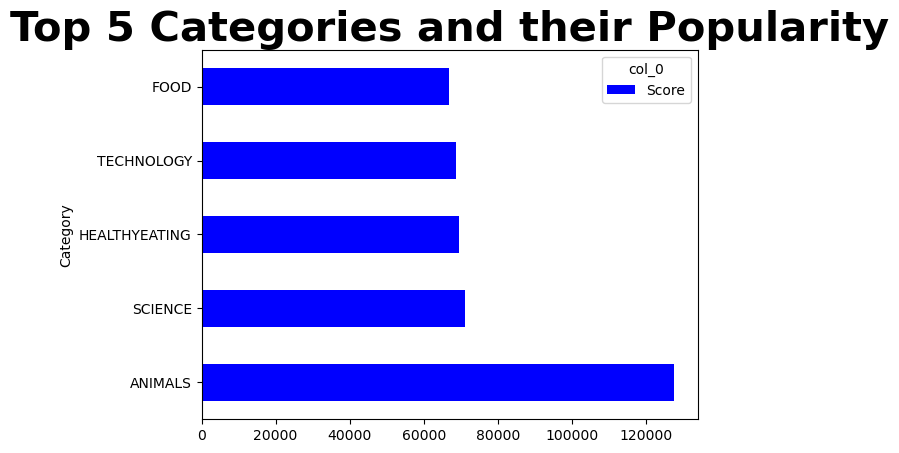

In [36]:
#plt.rc("font", size=14)
top_5_categories.plot.barh(color="b")
plt.title("Top 5 Categories and their Popularity", fontsize=30, fontweight ='bold')

Text(0.5, 1.0, 'Bottom 5 Categories and their Popularity')

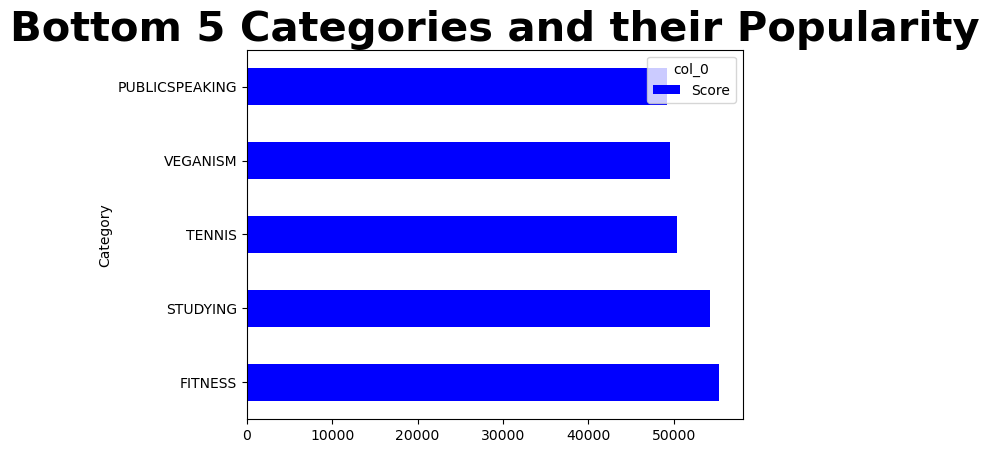

In [37]:
bottom_5_cat.plot.barh(color="b")
plt.title("Bottom 5 Categories and their Popularity", fontsize=30, fontweight ='bold')

### Most Common Reactions Type for Animal category.
Since Animal category has been established as the most popular category of post made by the users, let's examine the type of reactions this Animal post generates.

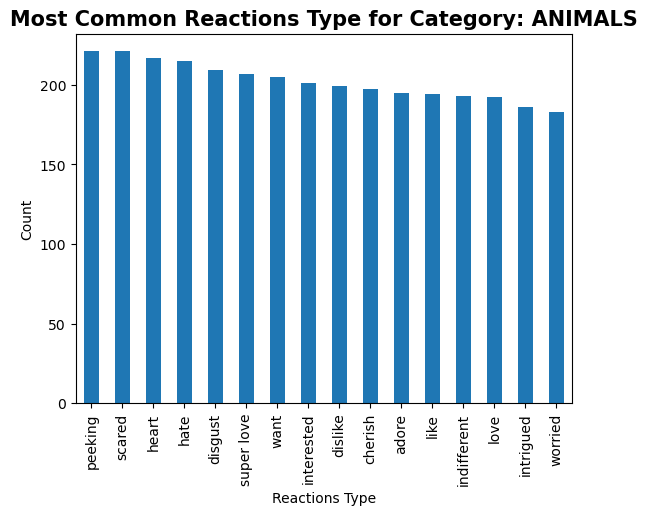

In [38]:
# Most Common Category Type and it's Most common reaction type
pop = full_table['Category'].value_counts().idxmax()
result = full_table.loc[full_table['Category'] == pop, 'Reactions Type']

# plot the result on a bar chart
result_counts = result.value_counts()
result_counts.plot.bar()
plt.title("Most Common Reactions Type for Category: {}".format(pop),fontsize=15, fontweight ='bold')
plt.xlabel("Reactions Type")
plt.ylabel("Count")
plt.show()


### Most common content type for Animal Category

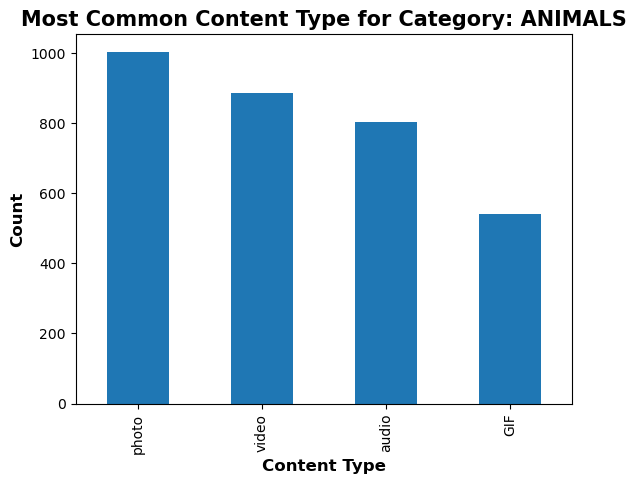

In [39]:
# Most Common Category Type and it's Most common content type
pop = full_table['Category'].value_counts().idxmax()
result = full_table.loc[full_table['Category'] == pop, 'Content Type']

# plot the result on a bar chart
result_counts = result.value_counts()
result_counts.plot.bar()
plt.title("Most Common Content Type for Category: {}".format(pop),fontsize=15, fontweight ='bold')
plt.xlabel("Content Type", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12,fontweight='bold')
plt.show()


### Most common Category Type and it's sentiment

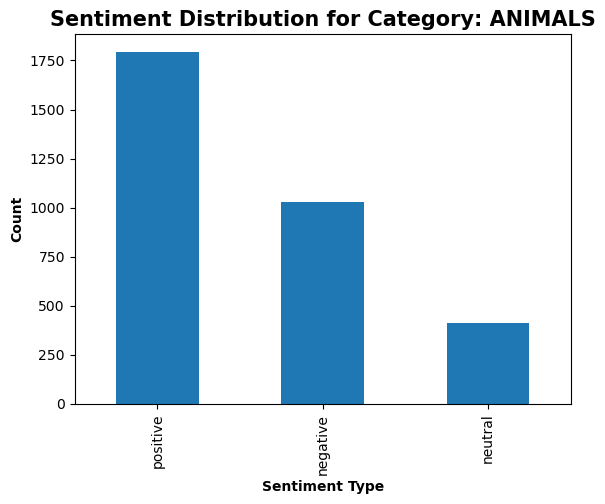

In [40]:
# Most Common Category Type and it's Most common Sentiment
pop = full_table['Category'].value_counts().idxmax()
result = full_table.loc[full_table['Category'] == pop, 'Sentiment']

# plot the result on a bar chart
result_counts = result.value_counts()
result_counts.plot.bar()
plt.title("Sentiment Distribution for Category: {}".format(pop), fontsize=15, fontweight ='bold')
#plt.xticks(fontsize=10, fontweight='bold')
plt.xlabel("Sentiment Type", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()


### Content Type and it's frequency

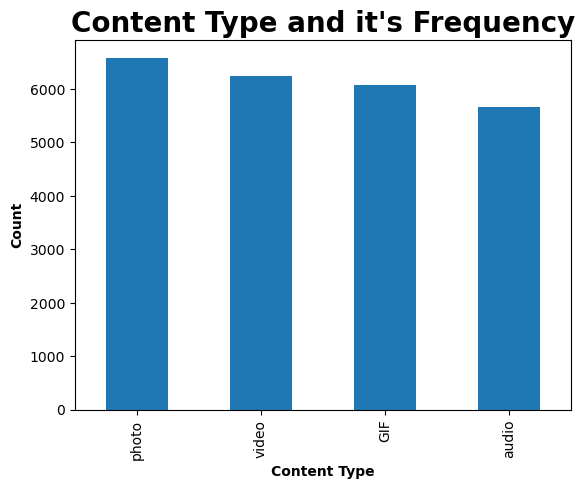

In [77]:
full_table['Content Type'].value_counts().plot(kind='bar')
plt.title("Content Type and it's Frequency", fontsize=20, fontweight ='bold')
plt.xlabel("Content Type", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.show()

#plt.xticks(fontsize=10, fontweight='bold');

This shows that most content on SocialBuzz Platforms are photos, while audios are the least.

### Number of posts made in each Month

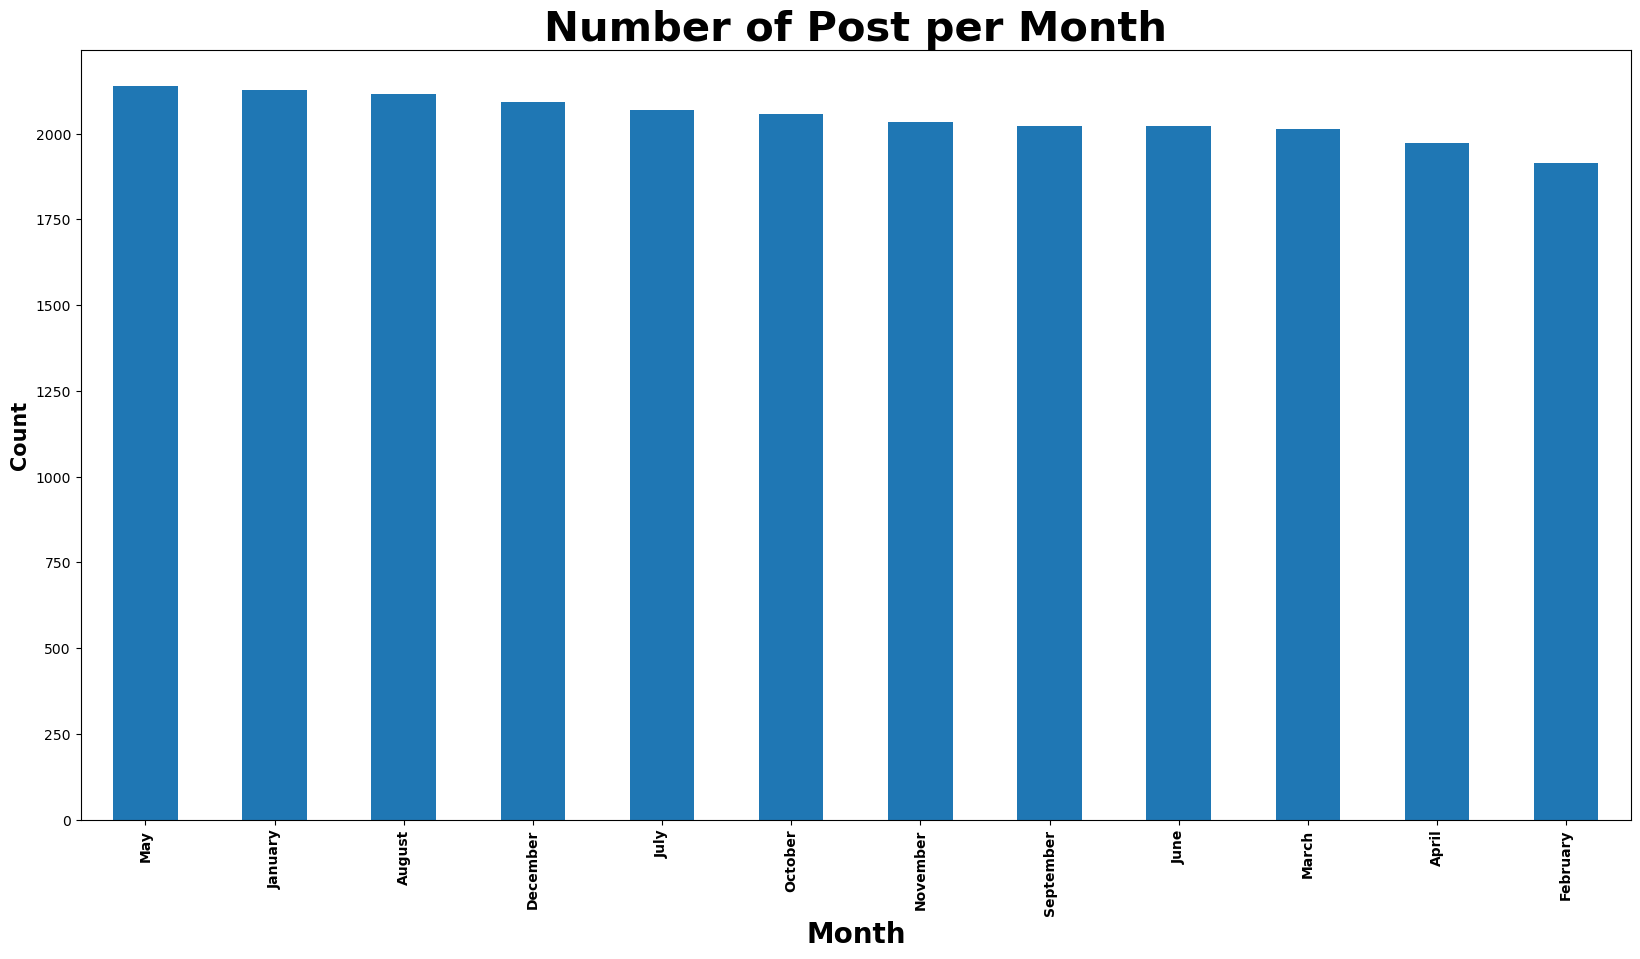

In [83]:
plt.figure(figsize= (20, 10))
full_table['content_month'].value_counts().plot(kind='bar')
plt.title("Number of Post per Month", fontsize=30, fontweight='bold')
plt.xlabel("Month", fontsize=20, fontweight='bold')
plt.ylabel("Count", fontsize=15,fontweight='bold')
plt.xticks(fontsize = 10, fontweight='bold')
plt.show();

## Conclusion
* Dataset has 16 Unique Categories
* `Animal` is the most popular Category, it's `Sentiment` is largely positive and majority of the content are photos.
* `Publicspeaking` is the least
* There are 16 unique reactions in the Animal catgory with `Peeking` being the most frequent and worried the least.
* `May` has the highest number of post, while `February` has the least.
* Most of the content made on SOcial Buzz are `Photos` followed by `video`, `GIF` and `audio` respectively.


* [Back to Top](#accenture-virtual-internship)